In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

from keras import initializers
from keras import regularizers

from keras.layers import Dropout
from keras.optimizers import RMSprop, Adagrad, Adam
from keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split

C:\Users\JinGyu Choi\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from sklearn.datasets import load_iris

In [3]:
iris=load_iris()
x=iris.data
y=iris.target
target_names=iris.target_names
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [4]:
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=10,test_size=0.2)

In [5]:
Y_train=np.eye(3)[y_train].astype(int)
Y_test=np.eye(3)[y_test].astype(int)

In [6]:
in_dim=4
out_dim=3
h_dim=16

model=Sequential()
model.add(Dense(input_dim=in_dim, units=h_dim, kernel_initializer=initializers.truncated_normal(mean=0, stddev=0.05, seed=21),
                bias_initializer='zeros'))
model.add(Activation('sigmoid'))
model.add(Dense(units=out_dim, kernel_initializer=initializers.truncated_normal(mean=0, stddev=0.05, seed=52),
                bias_initializer='zeros'))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                80        
_________________________________________________________________
activation_1 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 51        
_________________________________________________________________
activation_2 (Activation)    (None, 3)                 0         
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [7]:
opt=SGD(lr=0.1)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [8]:
print(model.get_weights()[0])
print(model.get_weights()[1])
print(model.get_weights()[2])
print(model.get_weights()[3])

[[-0.06651231  0.06084896 -0.02027105  0.0429353   0.00484679  0.03771814
   0.04159919  0.04786976 -0.03979918  0.05438533  0.02591087 -0.02320846
  -0.0983348   0.04131412  0.01668444 -0.02029468]
 [-0.00114676  0.0499071  -0.09091502 -0.01994444 -0.00986788  0.01910614
   0.00326421 -0.06318492 -0.03992816 -0.03367455  0.0283653   0.01777256
  -0.0328366   0.01893912 -0.00831938 -0.04864088]
 [ 0.01954323 -0.01041132  0.02627815  0.04530815 -0.02908938 -0.01692891
   0.01367663 -0.09941607  0.09239485  0.02014716  0.03926263 -0.09033368
   0.00022338 -0.0357491   0.04413448 -0.0015355 ]
 [ 0.0762908  -0.0480655   0.00265197 -0.07798473 -0.03276191 -0.00071364
   0.05602922  0.02409859 -0.02290691  0.01899253  0.04512818  0.05136125
  -0.03117363  0.03559926  0.00875094 -0.05917511]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[-0.04273521  0.01987622 -0.01489236]
 [ 0.05379617 -0.05647922  0.08901107]
 [-0.0623383  -0.03034982  0.02403201]
 [ 0.02695994  0.03014457 -0.0120427

In [9]:
#model.get_weights?

In [10]:
n_epochs = 1000
hist=model.fit(X_train,Y_train, validation_split=0.25, epochs=n_epochs, verbose=0)

In [11]:
print(hist.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


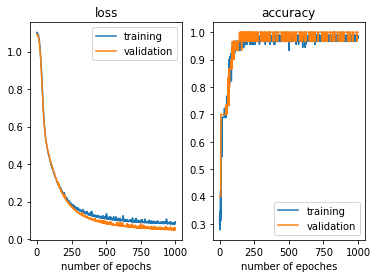

In [12]:
hist_loss=np.array(hist.history['loss'])
hist_loss_val=np.array(hist.history['val_loss'])

plt.subplot(121)
plt.plot(hist_loss , label='training')
plt.plot(hist_loss_val, label='validation')

plt.xlabel('number of epochs')
plt.title('loss')
plt.legend()

plt.subplot(122)
hist_acc=np.array(hist.history['acc'])
hist_acc_val=np.array(hist.history['val_acc'])

plt.plot(hist_acc, label='training')
plt.plot(hist_acc_val, label='validation')

plt.xlabel('number of epoches')
plt.title('accuracy')
plt.legend()

plt.show()

In [13]:
loss_train,acc_train=model.evaluate(X_train,Y_train,verbose=0)
loss_test, acc_test= model.evaluate(X_test, Y_test, verbose=0)
print('loss (train, test) : \n',loss_train, ',' , loss_test)
print('accuracy (train, test) : \n',acc_train, ',' , acc_test)

loss (train, test) : 
 0.07578594858447711 , 0.06998015940189362
accuracy (train, test) : 
 0.9916666666666667 , 0.9666666388511658


In [14]:
classes_test=model.predict_classes(X_test,verbose=0)
print(classes_test)
print(y_test)

[1 2 0 1 0 1 2 1 0 1 1 2 1 0 0 2 1 0 0 0 2 2 2 0 1 0 1 1 1 2]
[1 2 0 1 0 1 1 1 0 1 1 2 1 0 0 2 1 0 0 0 2 2 2 0 1 0 1 1 1 2]


In [15]:
n_epochs = 100
n_batch = 32
hist=model.fit(X_train,Y_train,validation_split=0.25, epochs=n_epochs, batch_size= n_batch, verbose=0)

In [17]:
in_dim=4
out_dim=3
h_dim=16

model=Sequential()
model.add(Dense(input_dim=in_dim, units=h_dim, kernel_initializer=initializers.truncated_normal(mean=0, stddev=0.05, seed=21),
               bias_initializer='zeros'))
model.add(Activation('relu'))

model.add(Dense(units=out_dim, kernel_initializer=initializers.truncated_normal(mean=0, stddev=0.05, seed=52),
               bias_initializer='zeros'))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 16)                80        
_________________________________________________________________
activation_4 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 51        
_________________________________________________________________
activation_5 (Activation)    (None, 3)                 0         
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [26]:
in_dim=4
out_dim=3
h_dim=16

model=Sequential()
model.add(Dense(input_dim=in_dim, units=h_dim, kernel_initializer=initializers.truncated_normal(mean=0, stddev=0.05, seed=21),
               kernel_regularizer=regularizers.l2(0.01),
               bias_initializer='zeros',
               bias_regularizer=regularizers.l2(0.01)))
model.add(Activation('relu'))

model.add(Dense(units=out_dim, kernel_initializer=initializers.truncated_normal(mean=0, stddev=0.01, seed=52),
               kernel_regularizer=regularizers.l2(0.01),
               bias_initializer='zeros',
               bias_regularizer=regularizers.l2(0.01)))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 16)                80        
_________________________________________________________________
activation_8 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 3)                 51        
_________________________________________________________________
activation_9 (Activation)    (None, 3)                 0         
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [32]:
in_dim=4
out_dim=3
h_dim=16

model=Sequential()
model.add(Dense(input_dim=in_dim, units=h_dim, kernel_initializer=initializers.truncated_normal(mean=0, stddev=0.01, seed=21),
               kernel_regularizer=regularizers.l2(0.01),
               bias_initializer='zeros',
               bias_regularizer=regularizers.l2(0.01)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(units=out_dim, kernel_initializer=initializers.truncated_normal(mean=0, stddev=0.01, seed=52),
               kernel_regularizer=regularizers.l2(0.01),
               bias_initializer='zeros',
               bias_regularizer=regularizers.l2(0.01)))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 16)                80        
_________________________________________________________________
activation_12 (Activation)   (None, 16)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 3)                 51        
_________________________________________________________________
activation_13 (Activation)   (None, 3)                 0         
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [33]:
#RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
opt=RMSprop(lr=0.1)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [34]:
#Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0,)
opt=Adam(lr=0.1)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [36]:
#EarlyStopping?

In [35]:
n_epochs=100

stopper=EarlyStopping(monitor='val_loss', patience=10)
hist=model.fit(X_train,Y_train, validation_split=0.25, epochs=n_epochs, verbose=1, callbacks=[stopper])

Train on 90 samples, validate on 30 samples
Epoch 1/100
90/90 [==============================] - 1s 12ms/step - loss: 1.1284 - acc: 0.3111 - val_loss: 1.1413 - val_acc: 0.4000
Epoch 2/100
90/90 [==============================] - 0s 156us/step - loss: 1.0694 - acc: 0.4889 - val_loss: 0.8598 - val_acc: 0.9333
Epoch 3/100
90/90 [==============================] - 0s 400us/step - loss: 0.8083 - acc: 0.6778 - val_loss: 0.6099 - val_acc: 0.7000
Epoch 4/100
90/90 [==============================] - 0s 155us/step - loss: 0.6130 - acc: 0.6778 - val_loss: 0.4982 - val_acc: 0.9667
Epoch 5/100
90/90 [==============================] - 0s 167us/step - loss: 0.5834 - acc: 0.8222 - val_loss: 0.4476 - val_acc: 0.8667
Epoch 6/100
90/90 [==============================] - 0s 155us/step - loss: 0.5375 - acc: 0.8111 - val_loss: 0.5536 - val_acc: 0.7000
Epoch 7/100
90/90 [==============================] - 0s 155us/step - loss: 0.5400 - acc: 0.7889 - val_loss: 0.5085 - val_acc: 0.8667
Epoch 8/100
90/90 [=======